In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime



In [114]:
#uploading google/apple data
AppleDF = pd.read_csv('AppleStore.csv')
#GoogleDF=pd.read_csv('googleplaystore.csv')
AppleDF.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [115]:
#need to convers objects to int
#print(GoogleDF.shape)
#GoogleDF.info()
#GoogleDF.head()

In [116]:
print(AppleDF.shape)
AppleDF.info()


(7197, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [117]:
#Change the unit of size_bytes into Megabytes
AppleDF['size_bytes_in_MB'] = AppleDF['size_bytes'] / (1024 * 1024)
AppleDF = AppleDF.drop(columns=['size_bytes','vpp_lic','currency','id'])
AppleDF['size_bytes_in_MB']=AppleDF['size_bytes_in_MB'].astype(int)


In [118]:
AppleDF['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [119]:
AppleDF.head()

,Unnamed: 0,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,size_bytes_in_MB
0,1,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,96
1,2,Evernote - stay organized,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,151
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,95
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,122
4,5,Bible,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,88


In [144]:
print ('1. Free apps are ' + str(sum(AppleDF.price == 0)))
print ('2.  super expensive apps ' + str(sum(AppleDF.price > 50)))
print (' -  which is around ' + str(sum(AppleDF.price > 50)/len(AppleDF.price)*100) +
       " % of the total Apps")
print (' the most expensive apps: ')
outlier=AppleDF[AppleDF.price>50][['track_name','price','prime_genre','user_rating']]

outlier

1. Free apps are 4056
2.  super expensive apps 7
 -  which is around 0.09726274836737529 % of the total Apps
 the most expensive apps: 


,track_name,price,prime_genre,user_rating
115,Proloquo2Go - Symbol-based AAC,249.99,Education,4.0
162,NAVIGON Europe,74.99,Navigation,3.5
1136,Articulation Station Pro,59.99,Education,4.5
1479,LAMP Words For Life,299.99,Education,4.0
2181,Articulation Test Center Pro,59.99,Education,4.5
2568,KNFB Reader,99.99,Productivity,4.5
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business,4.0


In [121]:
def visualizer(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(10,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y)
    elif plot_type == "count":  
        sns.countplot(x)
    elif plot_type == "reg":  
        sns.regplot(x=x,y=y)
    elif plot_type == "join":
        sns.jointplot(x=x,y=y)
    elif plot_type == "pair":
        sns.set(style="ticks")
        sns.pairplot (x)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=13,rotation=rotation_value)
    plt.show()

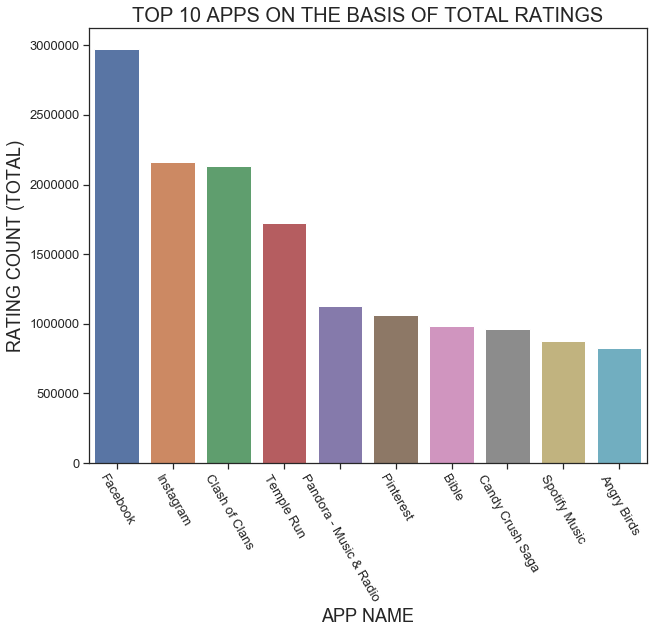

In [122]:
Apple_data_sorted = AppleDF.sort_values('rating_count_tot', ascending=False)
subset_store_data_sorted = Apple_data_sorted[:10]

visualizer(subset_store_data_sorted.track_name, subset_store_data_sorted.rating_count_tot, "bar", "TOP 10 APPS ON THE BASIS OF TOTAL RATINGS",
          "APP NAME", "RATING COUNT (TOTAL)", True, -60)

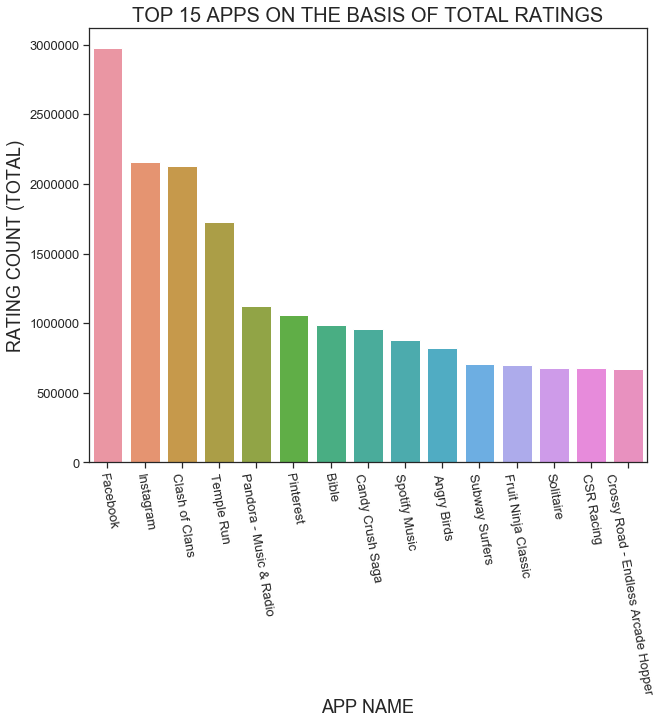

In [123]:
Apple_data_sorted = AppleDF.sort_values('rating_count_tot', ascending=False)
subset_store_data_sorted = Apple_data_sorted[:15]

visualizer(subset_store_data_sorted.track_name, subset_store_data_sorted.rating_count_tot, "bar", "TOP 15 APPS ON THE BASIS OF TOTAL RATINGS",
          "APP NAME", "RATING COUNT (TOTAL)", True, -80)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


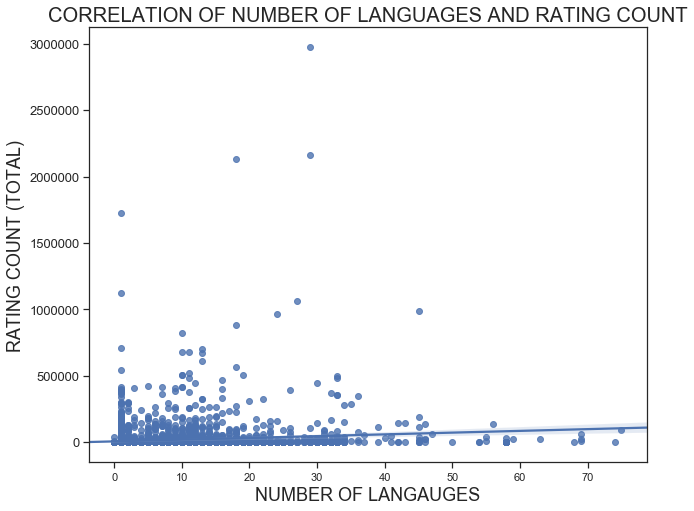

In [124]:
visualizer(AppleDF["lang.num"], AppleDF.rating_count_tot, "reg", 
          "CORRELATION OF NUMBER OF LANGUAGES AND RATING COUNT", "NUMBER OF LANGAUGES",
          "RATING COUNT (TOTAL)", False)

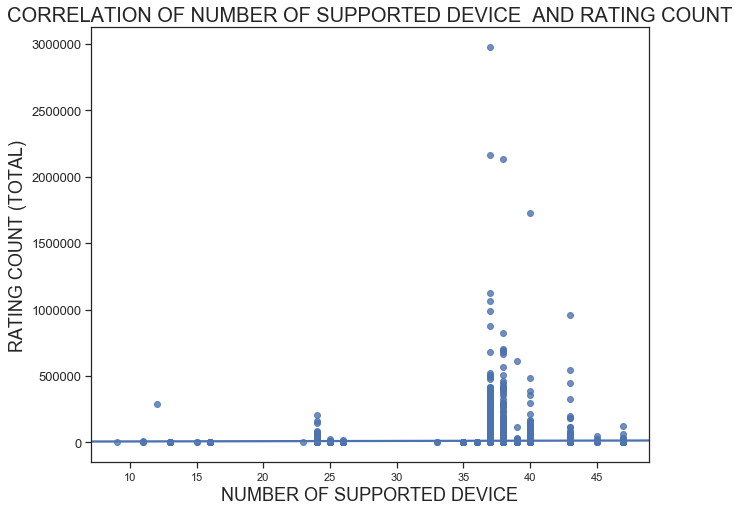

In [125]:
visualizer(AppleDF["sup_devices.num"], AppleDF.rating_count_tot, "reg", 
          "CORRELATION OF NUMBER OF SUPPORTED DEVICE  AND RATING COUNT", "NUMBER OF SUPPORTED DEVICE",
          "RATING COUNT (TOTAL)", False)

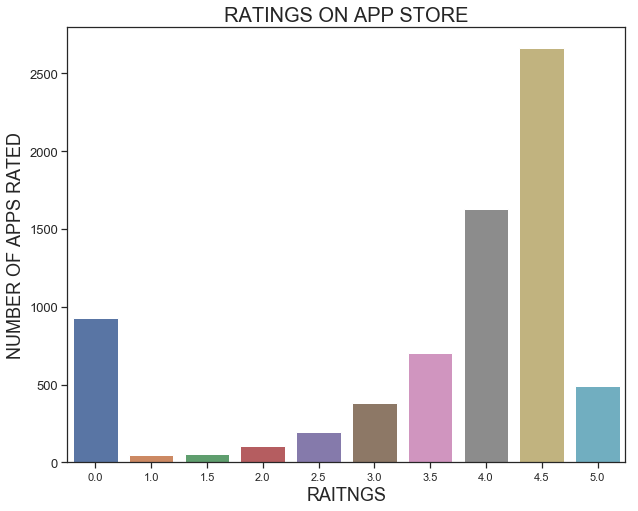

In [126]:
visualizer(AppleDF.user_rating, None, "count","RATINGS ON APP STORE",
         "RAITNGS", "NUMBER OF APPS RATED")

In [127]:
ratings = AppleDF.loc[:,["track_name","prime_genre","user_rating","rating_count_tot","price"]]
ratings = ratings.sort_values(by=["user_rating","rating_count_tot"],ascending=False)
ratings.head()

,track_name,prime_genre,user_rating,rating_count_tot,price
1104,Head Soccer,Games,5.0,481564,0.00
302,Plants vs. Zombies,Games,5.0,426463,0.99
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,Games,5.0,386521,0.00
2177,Geometry Dash Lite,Games,5.0,370370,0.00
498,Infinity Blade,Games,5.0,326482,0.99


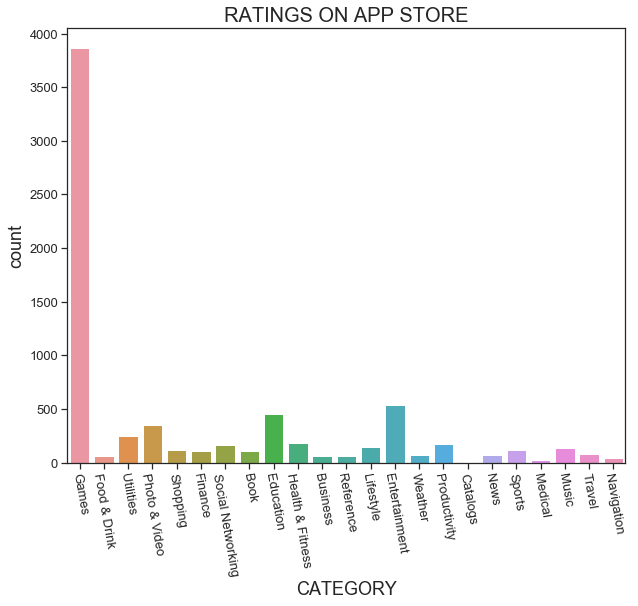

In [128]:
visualizer(ratings["prime_genre"], None, "count","RATINGS ON APP STORE",
         "CATEGORY", "count",True,-80)

In [129]:
#cheacking coralation rating&price. for start:games. After that, in general

In [130]:
top_free_games = ratings[(ratings["prime_genre"]=="Games") & (ratings["price"]==0)]
top_free_games.head(3)

,track_name,prime_genre,user_rating,rating_count_tot,price
1104,Head Soccer,Games,5.0,481564,0.0
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,Games,5.0,386521,0.0
2177,Geometry Dash Lite,Games,5.0,370370,0.0


In [131]:
top_paid_games = ratings[(ratings["prime_genre"]=="Games") & (ratings["price"]!=0)]
top_paid_games.head(3)

,track_name,prime_genre,user_rating,rating_count_tot,price
302,Plants vs. Zombies,Games,5.0,426463,0.99
498,Infinity Blade,Games,5.0,326482,0.99
1877,Geometry Dash,Games,5.0,266440,1.99


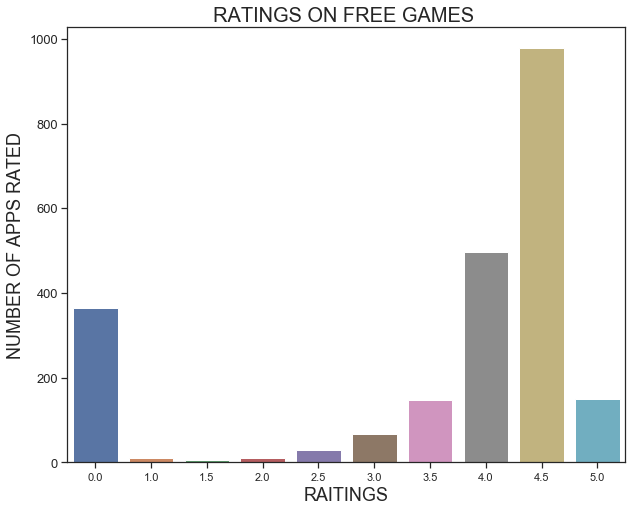

In [132]:
visualizer(top_free_games.user_rating, None, "count","RATINGS ON FREE GAMES ",
         "RAITINGS", "NUMBER OF APPS RATED")

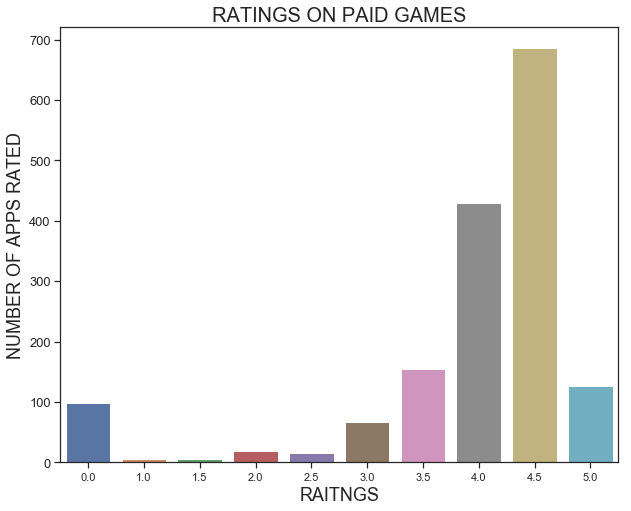

In [133]:
visualizer(top_paid_games.user_rating, None, "count","RATINGS ON PAID GAMES",
         "RAITNGS", "NUMBER OF APPS RATED")

In [134]:
top_free_apps_without_games = ratings[(ratings["prime_genre"]!="Games") & (ratings["price"]==0)]
top_free_apps_without_games.shape

(1799, 5)

In [135]:
top_paid_apps_without_games = ratings[(ratings["prime_genre"]!="Games") & (ratings["price"]!=0)]
top_paid_apps_without_games.shape

(1536, 5)

<Figure size 720x576 with 0 Axes>

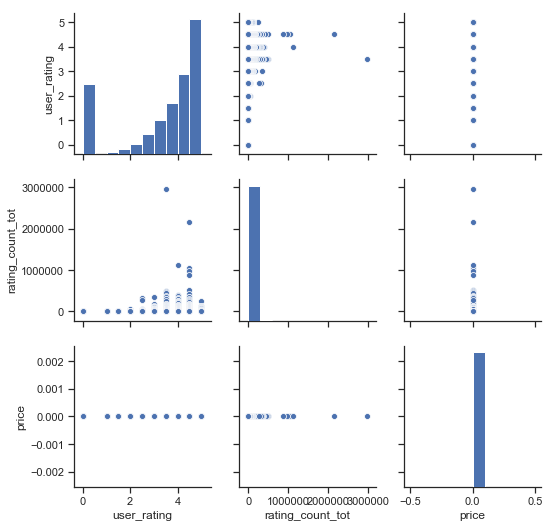

In [136]:
visualizer(top_free_apps_without_games, None, "pair","",
         "RAITNGS", "NUMBER OF APPS RATED")

<Figure size 720x576 with 0 Axes>

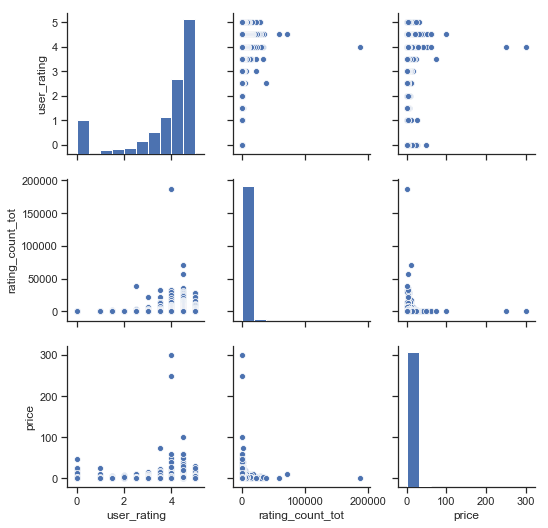

In [137]:
visualizer(top_paid_apps_without_games, None, "pair","",
         "RAITNGS", "NUMBER OF APPS RATED")

In [138]:
percentual = round(AppleDF["user_rating"].value_counts() / len(AppleDF["user_rating"]) * 100,3)

print("User rating Percentual in %: ")
print(percentual)

User rating Percentual in %: 
4.5    37.002
4.0    22.593
0.0    12.908
3.5     9.754
5.0     6.836
3.0     5.322
2.5     2.723
2.0     1.473
1.5     0.778
1.0     0.611
Name: user_rating, dtype: float64


In [139]:
percentual1 = round(AppleDF["user_rating_ver"].value_counts() / len(AppleDF["user_rating_ver"]) * 100,3)

print("User rating (last version) in %: ")
print(percentual1)

User rating (last version) in %: 
4.5    30.638
0.0    20.050
4.0    17.188
5.0    13.394
3.5     7.406
3.0     4.224
2.5     2.445
2.0     1.890
1.0     1.737
1.5     1.028
Name: user_rating_ver, dtype: float64


In [140]:

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold


In [141]:
df_train = AppleDF[['size_bytes_in_MB', 'price', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'prime_genre']]
target =AppleDF['user_rating']

df_train = pd.get_dummies(df_train)

def categorize_rating(x):
    if x <= 4:
        return 0
    else:
        return 1

target = target.apply(categorize_rating)



In [142]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2, random_state=1989, stratify=target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (5757, 28)
X_test shape: (1440, 28)


In [143]:
models = [RandomForestClassifier(), MLPClassifier(), SVC(), KNeighborsClassifier(), AdaBoostClassifier(), GaussianNB()]
kfold = KFold(n_splits=5, random_state=1989)

clf_comparison = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score'])

for i, model in enumerate(models):
    clf = model
    cv_result = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy')
    clf_comparison.loc[i, 'Classfier_name'] = model.__class__.__name__
    clf_comparison.loc[i, 'train_score'] = cv_result['train_score'].mean()
    clf_comparison.loc[i, 'test_score'] = cv_result['test_score'].mean()

clf_comparison

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

,Classfier_name,train_score,test_score
0,RandomForestClassifier,0.954968,0.585031
1,MLPClassifier,0.621026,0.612126
2,SVC,0.766893,0.59076
3,KNeighborsClassifier,0.718517,0.562967
4,AdaBoostClassifier,0.626454,0.602912
5,GaussianNB,0.553674,0.547682
